# Example on How to Use the STAR-package

In [1]:
from star import *

## If you want to see a function's documentation, 
1) help(function_name), or go to 2) [API](https://ludvigdoeser.github.io/stasp/index.html)

**To access the Lightcurve-functions, don't forget to write lightcurve.function_name**

In [2]:
help(lightcurve)

Help on class lightcurve in module star.Lightcurve:

class lightcurve(builtins.object)
 |  lightcurve(filename, keywords=[], p=0)
 |  
 |  Make a light curve object from fits-file.
 |  
 |  **Parameters**:
 |  
 |  `filename`: string 
 |      The path to the .fits-file. If an empty string is given, a lightcurve object will 
 |      be initiated without values for its attributes.
 |      
 |  `keywords`: list of strings    
 |      Keywords (and corresponding values) apart from the ones mentioned below to return.    
 |      All data-keys are always automatically returned (for a lightcurve, these are: {"TIME", "RATE", "ERROR","FRACEXP"}).   
 |      Note also that the header-keys {"CONTENT","OBJECT"} are returned if they exist.    
 |  
 |  `p`: boolean    
 |      If True, print the headers of the fits-file.
 |      
 |  **Attributes**:
 |  
 |  `t`: np.ndarray    
 |      Time vector (in seconds).
 |      
 |  `rate`: np.ndarray    
 |      Rate vector (in counts/s).
 |      
 |  `err

**To access the Lightcurve-functions, don't forget to write lightcurve.function_name**

In [3]:
help(lightcurve.extract_seg)

Help on function extract_seg in module star.Lightcurve:

extract_seg(self, m, n=0, bins_back=0, to_print=False, to_plot=False)
    Extract (and potentially display) a light curve segment.
    
    **Parameters**:
    
    `m`: int    
        Number of time bins per segment. 
    
    `n`: int, optional, default: 0    
        The start (end) of the segment will be bin number m*n (m*(n+1)) 
        
    `bins_back`: int, optional, default: 0 
        Number of bins the segment will be moved backwards in the light curve. 
        
    `to_print`: boolean, optional, default: False 
        If True, prints out average count rate, totalt counts, and total time of segment. 
        
    `to_plot`: boolean, optional, default: False 
        If True, plot the segment. 
    
    **Returns**: 
    
    `t_seg, rate_seg, err_seg`: np.ndarrays    
        Time, rate, and error vectors for the segment.
    
    `N_gamma, R, T`: floats    
        Number of photons (in counts), mean count rate (in 

# Import FITS-file:
**Pick a filename or use the default for this demonstration (press enter)**

In [4]:
filename = input('Path to FITS-file (press enter for default): ') or "Data/MAXIJ1535_571/1050360103/5to5.5kev.lc"
clear_output(True) #to remove the above input-line
data = extract_fits(filename)

Loading fits from filename:  Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
There is no content-information for this fits.
The keys to the data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'OBJECT'])
Loading fits done. 



**We can put p=1 to print out all headers:**

In [5]:
data = extract_fits(filename,p=1) 

Loading fits from filename:  Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
There is no content-information for this fits.
hdu.info()
Filename: Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU    312   26598R x 4C   ['D', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     50   3R x 2C   [1D, 1D]   
None 

Header0:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'NICER   '           / Telescope (mission) name 

**If we want to extract more keywords from fits-file we can do like this:**

In [6]:
data = extract_fits(filename,keywords=['EQUINOX','TELESCOP'],p=0) 
print('\nTELESCOPE = ',data['TELESCOP'])
print('EQUINOX = ',data['EQUINOX'])

Loading fits from filename:  Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
There is no content-information for this fits.
Found key EQUINOX in header0
Found key EQUINOX in header1.
Found key TELESCOP in header0
Found key TELESCOP in header1.
The keys to the data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'OBJECT', 'EQUINOX', 'TELESCOP'])
Loading fits done. 


TELESCOPE =  NICER
EQUINOX =  2000.0


**If our keyword is not in any header, we will get suggestions:**

In [7]:
data = extract_fits(filename,keywords=['TELE'],p=0) 

Loading fits from filename:  Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
There is no content-information for this fits.
There is no key TELE in header0, let's have a look at header1.
There is no key TELE in header1 either, sorry...
Matching keys in header0 =  ['TELESCOP']
Matching keys in header1 =  ['TELESCOP']
Do you want to extract the header0 key TELESCOP? [y/n] 
Do you want to extract the header1 key TELESCOP? [y/n] 
The keys to the data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'OBJECT'])
Loading fits done. 



In [8]:
# We now have the following keywords:
for keys in data:
    print(keys) 

TIME
RATE
ERROR
FRACEXP
OBJECT


# Import FITS-file to Lightcurve-object directly:

In [9]:
filename = "Data/MAXIJ1535_571/1050360103/5to5.5kev.lc" 
lc = lightcurve(filename,keywords=['MINCHAN','MAXCHAN'],p=0)

-----------------------------------------------------------------------------------------------------------
               Importing lightcurve from f = Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
-----------------------------------------------------------------------------------------------------------
Loading fits from filename:  Data/MAXIJ1535_571/1050360103/5to5.5kev.lc
There is no content-information for this fits.
There is no key MINCHAN in header0, let's have a look at header1.
There is no key MINCHAN in header1 either, sorry...
Matching keys in header0 =  []
Matching keys in header1 =  []
There is no key MAXCHAN in header0, let's have a look at header1.
There is no key MAXCHAN in header1 either, sorry...
Matching keys in header0 =  []
Matching keys in header1 =  []
The keys to the data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'OBJECT'])
Loading fits done. 

Light curve object for MAXIJ1535-571 in Eband = 5.0-5.5 keV created.
With parameters: N = 26598, dt = 0.005, R =

In [10]:
pprint(vars(lc))

{'Emax': 5.5,
 'Emean': 5.25,
 'Emin': 5.0,
 'Fvar': 0.25286876190981783,
 'N': 26598,
 'R': 117.30218,
 'deltaE': 0.25,
 'dt': 0.004999995231628418,
 'err': array([  0.    , 200.0002, 200.0002, ...,   0.    ,   0.    ,   0.    ],
      dtype=float32),
 'fracexp': array([0.99999905, 0.99999905, 0.99999905, ..., 0.99999905, 0.99999905,
       0.99999905], dtype=float32),
 'object': 'MAXIJ1535-571',
 'rate': array([  0.    , 200.0002, 200.0002, ...,   0.    ,   0.    ,   0.    ],
      dtype=float32),
 't': array([0.00000000e+00, 4.99999523e-03, 1.00000054e-02, ...,
       1.11689848e+04, 1.11689898e+04, 1.11689948e+04])}


## Look at the light curve

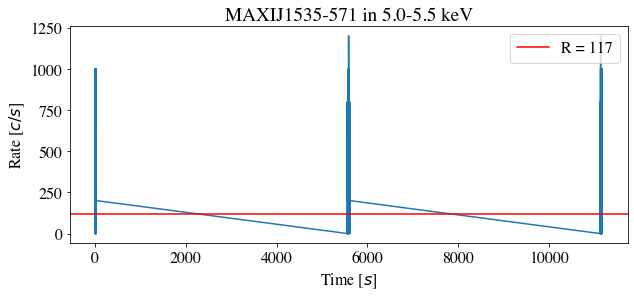

In [11]:
lc.plot()

Number of line segments of \approx 5s will be:  25


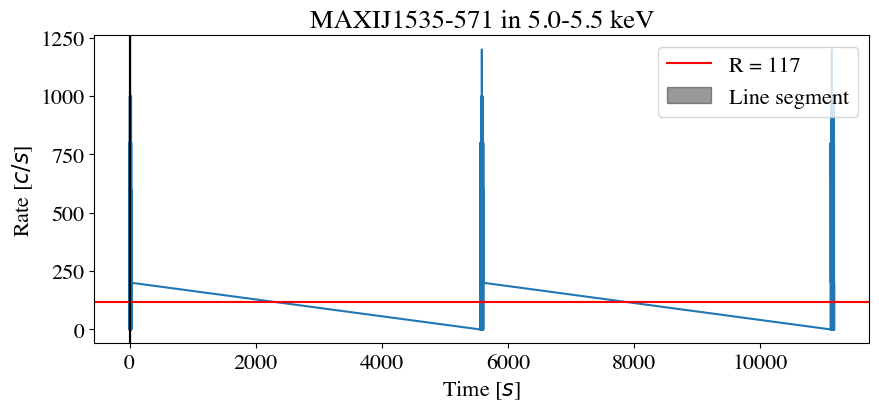

In [12]:
lc.plot(2**10,0)

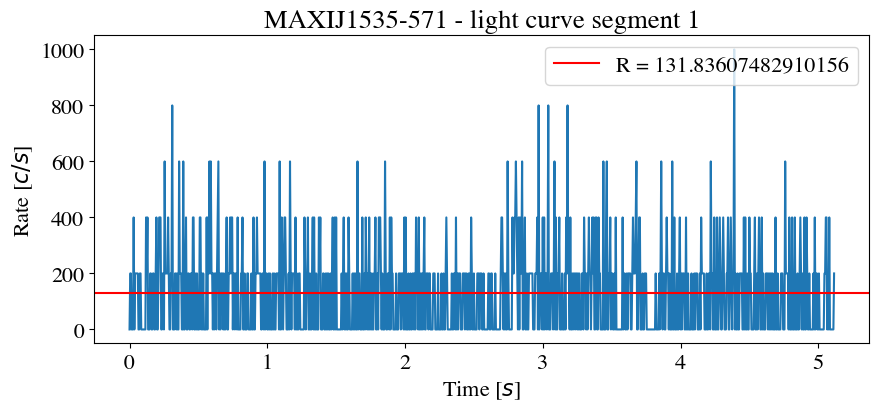

In [13]:
lc.extract_seg(m=2**10,n=0,to_plot=True)